In [4]:
from functions import *
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

i = -4; s_i up 954911605.8723737; s_i down 954911605.86774
i = -3; s_i up 21848.512252071163; s_i down 21848.512252070388
i = -2; s_i up 102.30710546034958; s_i down 102.30710546034905
i = -1; s_i up 5.355647384558094; s_i down 5.355647384558085
i = 0; s_i up 0.5800000000000001; s_i down 0.5799999999999998
i = 1; s_i up 0.05040772523470643; s_i down 0.05040772523470635
i = 2; s_i up 0.0010408203735796642; s_i down 0.0010408203735796538
i = 3; s_i up 5.39130149299365e-07; s_i down 5.391301492992495e-07
i = -4; c_i up 477488579.7042907; c_i down 477488579.7019733; d_i up 477488579.7042907; d_i down 477488579.7019733
i = -3; c_i up 11081.660323981552; c_i down 11081.66032398115; d_i up 11081.660323981552; d_i down 11081.66032398115
i = -2; c_i up 62.513361468242444; c_i down 62.51336146824212; d_i up 62.513361468242444; d_i down 62.51336146824212
i = -1; c_i up 5.7859121537777245; c_i down 5.785912153777714; d_i up 5.7859121537777245; d_i down 5.785912153777714
i = 0; c_i up 1.80557565652

In [22]:
mesh = 1e-5
def calculate_bounds(x):
    upper = (x + mesh) * (Si(x + mesh, 4) + Ti(x, 5)) / (Pi(x, 4) + Qi(x + mesh, 5))
    lower = x * (Si(x, 4) + Ti(x + mesh, 5)) / (Pi(x + mesh, 4) + Qi(x, 5))
    return upper, lower

def calculate_rounded_bounds(x):
    upper = (x + mesh) * (upSi(x + mesh, 4) + upTi(x, 5)) / (downPi(x, 4) + downQi(x + mesh, 5))
    lower = x * (downSi(x, 4) + downTi(x + mesh, 5)) / (upPi(x + mesh, 4) + upQi(x, 5))
    return upper, lower

values = np.arange(1/3, 3 + mesh, mesh)

In [23]:
upper_m = []
lower_m = []

with ThreadPoolExecutor() as executor:
    results = list(executor.map(calculate_rounded_bounds, values))

for result in results:
    upper_m.append(result[0])
    lower_m.append(result[1])

print("Upper bound: ", np.max(upper_m))
print("Lower bound: ", np.min(lower_m))

KeyboardInterrupt: 

In [2]:
mesh = 1e-7
Ss = [Si_memo(x, 4) for x in np.arange(1/3, 3 + mesh, mesh)]
Ts = [Ti_memo(x, 5) for x in np.arange(1/3, 3 + mesh, mesh)]
Ps = [Pi_memo(x, 4) for x in np.arange(1/3, 3 + mesh, mesh)]
Qs = [Qi_memo(x, 5) for x in np.arange(1/3, 3 + mesh, mesh)]
x = np.arange(1/3, 3 + mesh, mesh)

upper = []
lower = []
for i in range(len(Ss) - 1):
    upper.append((x[i] + mesh) * (Ss[i+1] + Ts[i]) / (Ps[i] + Qs[i+1]))
    lower.append(x[i] * (Ss[i] + Ts[i+1]) / (Ps[i+1] + Qs[i]))

print("Upper bound: ", np.max(upper))
print("Lower bound: ", np.min(lower))

Upper bound:  1.0000968714106602
Lower bound:  0.9999030108006773


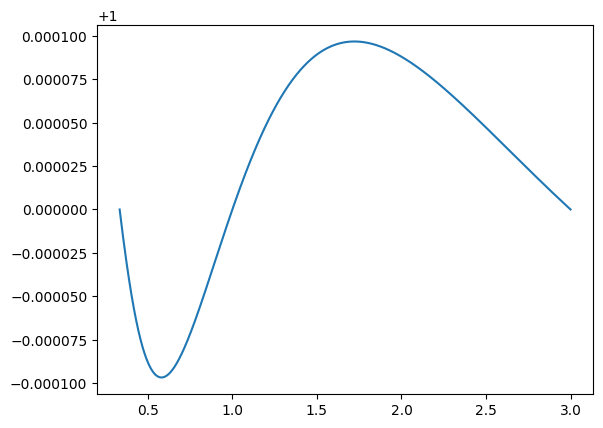

In [21]:
plot(M, start=1/3, end=3, l = 5, k = 4)

/Users/adamousherovitch/GamesResearch/random-turn-games/mina_margin_map/functions.py:294: RuntimeWarning: divide by zero encountered in scalar divide
  return sum([dpi(x, j) / (di(x, j) - 1) for j in range(0, i + 1)])


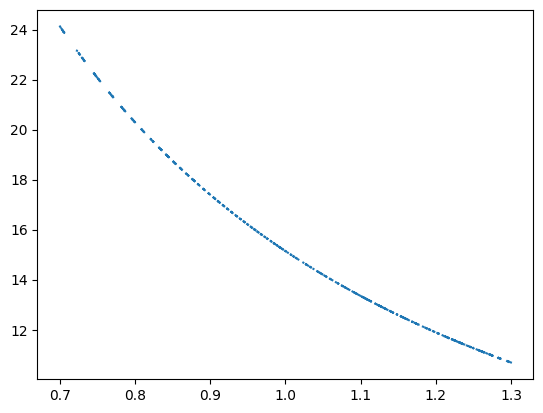

In [22]:
plot(Ei, start=0.7, end=1.3, i = 4)

In [1]:
plot(M_memo, start=0.3, end=3, l=5, k=4)

NameError: name 'plot' is not defined

In [ ]:
my_bisection(Mp54_wrapper(Mp), 0.5, 0.6, 1e-10)